In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

In [2]:
df_inc = pd.read_csv('SF_Incident_Reports_2003-2017_cleaned.csv')
df_inc.drop(columns=['Unnamed: 0'], inplace=True)
df_inc.head()

,pdid,incidntnum,incident_code,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,Year,Month,Day
0,3005373406112,30053734,6112,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Wednesday,2003-01-01T00:00:00.000,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2003,1,01T00:00:00.000
1,3000143205051,30001432,5051,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,2003-01-01T00:00:00.000,07:00,MISSION,NONE,2700 Block of 24TH ST,-122.407735,37.752825,"{'type': 'Point', 'coordinates': [-122.4077348...",2003,1,01T00:00:00.000
2,6027565709110,60275657,9110,FRAUD,"FORGERY, CREDIT CARD",Wednesday,2003-01-01T00:00:00.000,12:00,SOUTHERN,NOT PROSECUTED,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2003,1,01T00:00:00.000
3,3000122215040,30001222,15040,ASSAULT,INFLICT INJURY ON COHABITEE,Wednesday,2003-01-01T00:00:00.000,02:00,SOUTHERN,NONE,4TH ST / TOWNSEND ST,-122.394986,37.777091,"{'type': 'Point', 'coordinates': [-122.3949858...",2003,1,01T00:00:00.000
4,3000911306302,30009113,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Wednesday,2003-01-01T00:00:00.000,01:30,CENTRAL,NONE,THE EMBARCADERO NORTH ST / BAY ST,-122.402039,37.804257,"{'type': 'Point', 'coordinates': [-122.4020389...",2003,1,01T00:00:00.000


In [3]:
df_pop = pd.read_csv('sf_population_count.csv')
df_pop.drop(columns=['Unnamed: 0'], inplace=True)
df_pop.head()

,year,population
0,2009,797271
1,2010,789172
2,2011,797983
3,2012,807755
4,2013,817501


In [4]:
df_inc_yearly_sums = df_inc.groupby('Year')[['category']].agg('count')
df_inc_yearly_sums

,category
Year,
2003,110575
2004,110016
2005,106006
2006,102276
2007,102131
2008,104913
2009,103849
2010,99035
2011,97953


In [5]:
df_pop

,year,population
0,2009,797271
1,2010,789172
2,2011,797983
3,2012,807755
4,2013,817501
5,2014,829072
6,2015,840763
7,2016,850282
8,2017,864263
9,2018,870044


In [6]:
pop_years = np.array(df_pop['year'])
pop_count = np.array(df_pop['population'])

In [7]:
df_inc_years = np.array(df_inc_yearly_sums.index)
df_inc_count = df_inc_yearly_sums['category'].values

In [8]:
df_inc_count

array([110575, 110016, 106006, 102276, 102131, 104913, 103849,  99035,
        97953, 104846, 114276, 104928, 113657, 107536, 110058],
      dtype=int64)

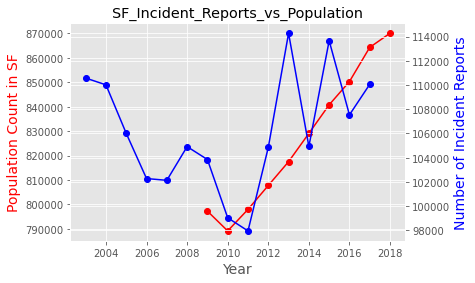

In [9]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(pop_years, pop_count, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Population Count in SF",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_inc_years, df_inc_count,color="blue",marker="o")
ax2.set_ylabel("Number of Incident Reports",color="blue",fontsize=14)

plt.title('SF_Incident_Reports_vs_Population')
plt.savefig("../images/SF_Incident_Reports_vs_Population.png")
plt.show()

Focusing on specific categories of crime 

The Top 6:
-Larcency/Theft
-Other Offenses
-Non-Criminal
-Assualt
-Vehicle Theft
-Drug/Narcotic

In [10]:
df_inc['category'].value_counts()

LARCENY/THEFT                  348816
OTHER OFFENSES                 224403
NON-CRIMINAL                   174038
ASSAULT                        140361
VEHICLE THEFT                   94197
DRUG/NARCOTIC                   88022
VANDALISM                       84226
WARRANTS                        74025
BURGLARY                        66957
SUSPICIOUS OCC                  58695
ROBBERY                         40476
MISSING PERSON                  32203
FRAUD                           30435
FORGERY/COUNTERFEITING          17245
SECONDARY CODES                 16532
WEAPON LAWS                     15392
TRESPASS                        14026
PROSTITUTION                    12461
STOLEN PROPERTY                  8462
SEX OFFENSES, FORCIBLE           7921
DISORDERLY CONDUCT               7395
DRUNKENNESS                      7380
RECOVERED VEHICLE                6578
DRIVING UNDER THE INFLUENCE      4215
KIDNAPPING                       3667
LIQUOR LAWS                      2985
ARSON       

In [11]:
names = ['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'VEHICLE THEFT', 'DRUG/NARCOTIC']
frame_names = ['df_theft', 'df_misc', 'df_non_crim', 'df_ass', 'df_veh', 'df_drug']

In [12]:
frames = []
for index, name in enumerate(names):
    frame = df_inc[df_inc['category'] == name]
    frame = frame.groupby('Year')[['category']].agg('count')
    frames.append(frame)

In [13]:
def plot_data(frame, name):
    years = np.array(frame.index)
    crime_score = np.array(frame['category'].values)
    
    
    # create figure and axis objects with subplots()
    fig, ax = plt.subplots()
    # make a plot
    ax.plot(pop_years, pop_count, color="red", marker="o")
    # set x-axis label
    ax.set_xlabel("Year",fontsize=14)
    # set y-axis label
    ax.set_ylabel("Population Count in SF", color="red", fontsize=14)

    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(years, crime_score,color="blue",marker="o")
    ax2.set_ylabel("Number of {}".format(name),color="blue",fontsize=14)

    plt.title('SF_Incident_Reports_vs_{}'.format(name))
    plt.savefig("../images/SF_{}_vs_Population.png".format(name))
#     plt.show()

In [14]:
names2 = ['LARCENY_THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'VEHICLE THEFT', 'DRUG_NARCOTIC']

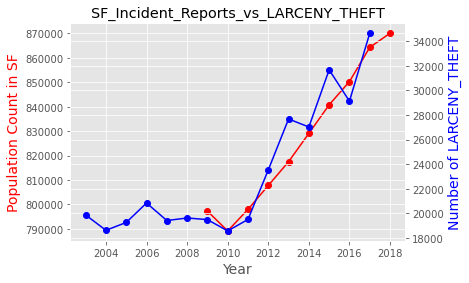

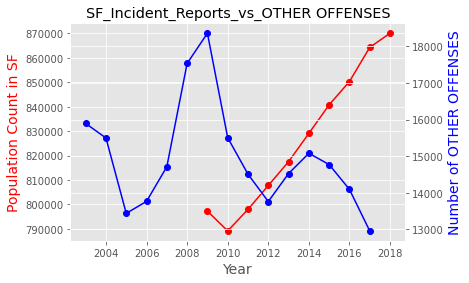

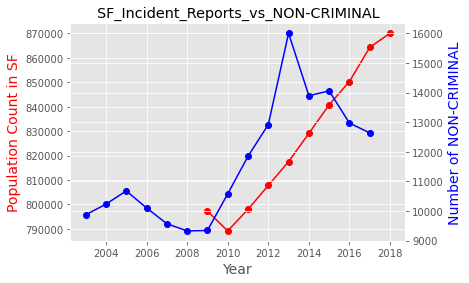

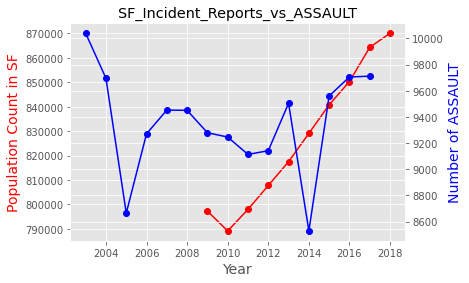

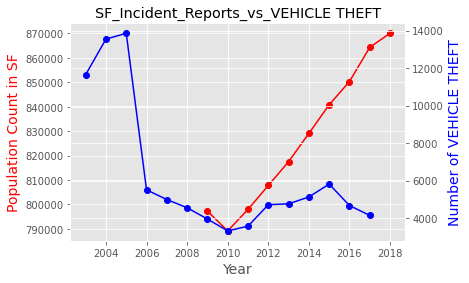

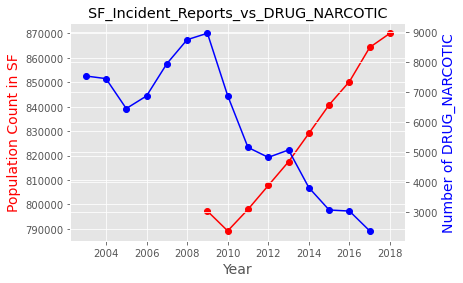

In [15]:
for index, frame in enumerate(frames):
    name = names2[index]
    plot_data(frame, name)

In [16]:
frame = frames[0]
years = np.array(frame.index)
crime_score = np.array(frame['category'].values)
crime_score = crime_score[5:]

In [17]:
np.divide(crime_score, pop_count)

array([0.02460644, 0.02469044, 0.02326616, 0.02414098, 0.02878406,
       0.03337587, 0.03213985, 0.03724999, 0.03369576, 0.03982327])

In [18]:
len(pop_years)

10

In [25]:
# plotting a single line (crime/population)
def plot_singles(frame, name):
    years = np.array(frame.index)
    years = years[5:]
    
    crime_score = np.array(frame['category'].values)
    crime_score = crime_score[5:]
    
#     pop_count = np.divide(10000, pop_count) # converting population to every 10 thousand
    div_score = np.divide(crime_score, pop_count)# the divided crime score by the population
    # create figure and axis objects with subplots()
    fig, ax = plt.subplots()
    # make a plot
    ax.plot(years, div_score, color="red", marker="o")
    # set x-axis label
    ax.set_xlabel("Year",fontsize=14)
    # set y-axis label
    ax.set_ylabel("{}/Population Count in SF".format(name), color="red", fontsize=14)
    plt.title('{}/Population Count in SF'.format(name))
    plt.savefig("../images/SF_{}_Divided_by_Population.png".format(name))

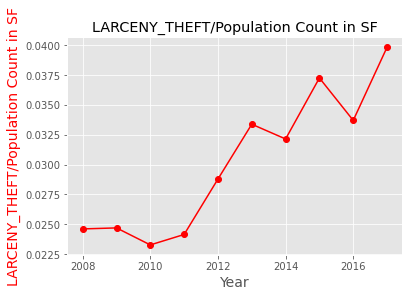

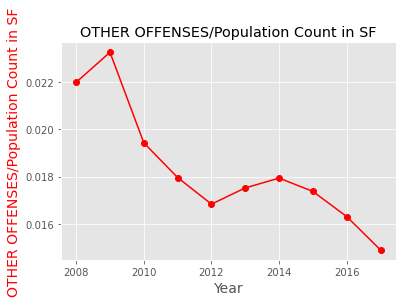

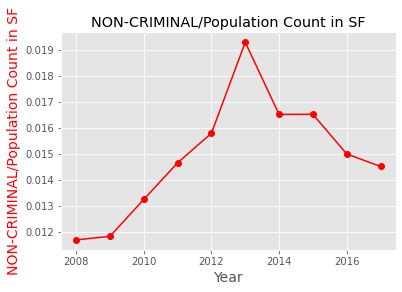

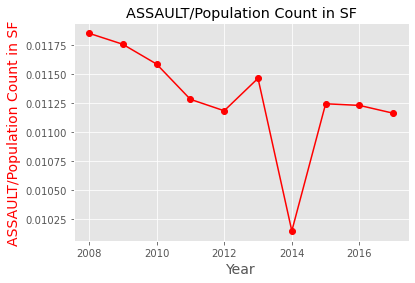

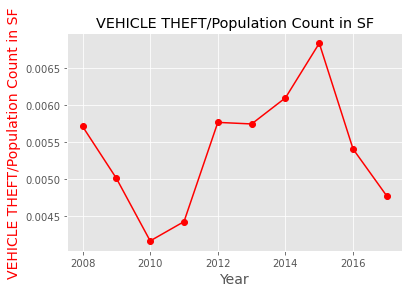

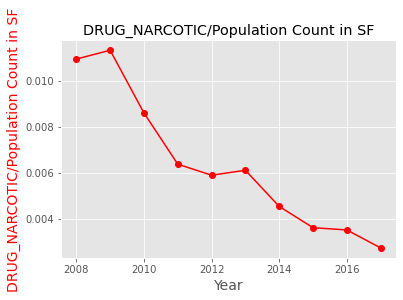

In [26]:
for index, frame in enumerate(frames):
    name = names2[index]
    plot_singles(frame, name)

In [ ]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

df_inc_sliced = df_inc_count[5:]
# make a plot
ax.plot(pop_years, df_inc_sliced, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Population Count/Incidents in SF",color="red",fontsize=14)
plt.savefig("../images/SF_Incidents_Divided_by_Population.png")
plt.show()